# 📦 1. Import Required Libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
# 📥 2. Load Dataset
df = pd.read_csv("height_weight_gender.csv")

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
df.shape

(10000, 3)

In [9]:
# 🔎 6. Unique Values in Gender Column
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

# 🔁 7. Convert Gender to Numeric (Male=1, Female=0)


In [10]:
df.Gender = df.Gender.apply(lambda x: 1 if x=='Male' else 0 )

In [11]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [12]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,0.691072,0.796723
Height,0.691072,1.000000,0.924756
Weight,0.796723,0.924756,1.000000


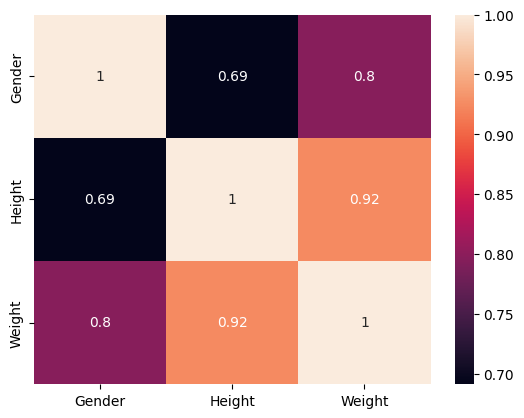

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()


In [14]:
X = df.drop(["Weight"],axis=1)
y = df["Weight"]

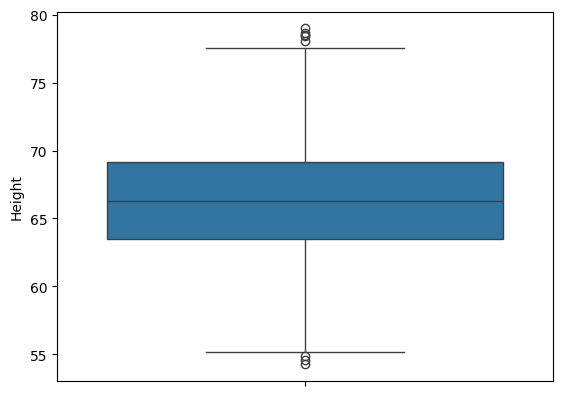

In [15]:
sns.boxplot(X['Height'])
plt.show()

# 🧹 13. Remove Outliers in Height Using IQR


In [16]:
q1 = np.percentile(df['Height'],25)
q3 = np.percentile(df['Height'],75)
iqr = q3 - q1
lb = q1 - (1.5* iqr)
ub = q3 + (1.5* iqr)

In [78]:
# Apply Outlier Filter
df = df[(df["Height"]<=ub) & (df["Height"]>=lb)]

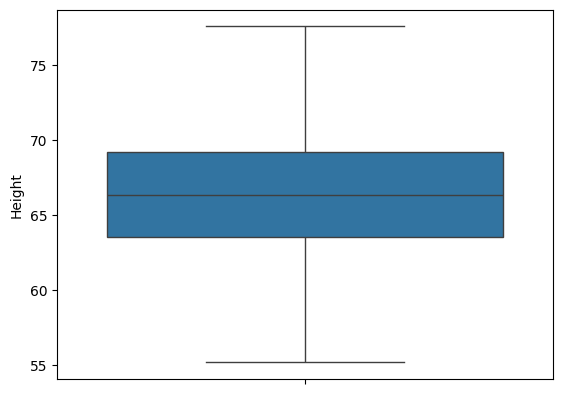

In [79]:
# 🔁 14. Recheck Boxplot After Outlier Removal
sns.boxplot(df["Height"])
plt.show()

# 🎯 15. Define Features and Target Again After Filtering


In [85]:
X = df.iloc[:,:-1]
y = df["Weight"]
X.shape, y.shape

((9992, 2), (9992,))

# ✂️ 16. Split the Data into Training and Testing Sets


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# 🧠 17. Initialize Linear Regression Model


In [87]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [88]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
y_train_pred = lr.predict(X_train)

# 🧠 17. Initialize Linear Regression Model


In [94]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [96]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_train_pred))
print("r2_score", r2_score(y_train, y_train_pred)*100)

mean_absolute_error: 7.980279070296578
r2_score 90.1673486602381


In [97]:
y_test_pred = lr.predict(X_test)

In [ ]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_Te_pred))
print("r2_score", r2_score(y_train, y_train_pred)*100)